# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>**Clasificando los datos**</h1>

### Creando un modelo inicial

In [4]:
import pandas as pd

In [5]:
datos = pd.read_csv('../data/prestacar.csv')

In [6]:
datos

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


El siguiente paso es segmentar nuestro conjunto de datos en nuestra base para poder obtener todos los atributos explicativos de mi variable de respuesta.

Quitamos la columna `moroso` y debemos especificar el eje `axis=1`. Y `y` va a ser únicamnte la columna `moroso`. Entonces, de esta manera ya tengo en `X` todas las variables explicativas, o sea, desde el ingreso del cliente hasta el cambio de teléfono, y en `Y` únicamente tengo si es deudor o no.

In [7]:
X = datos.drop(columns='moroso', axis=1)
y = datos.moroso

In [8]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

1.0

In [9]:
print(f'La exactitud del modelo es: {modelo.score(X, y)}')

La exactitud del modelo es: 1.0


La manera en que ejecutamos ese primer modelo es similar a darle a una persona un examen con las respuestas y, después de que esa persona tenga acceso a ese examen con todas las respuestas, presentarle exactamente el mismo examen con las mismas respuestas. Si la persona memoriza ese examen con las mismas palabras y respuestas, entonces el día de mañana que le quieras preguntar algo similar con otras palabras, tal vez la persona no tenga la capacidad de generalizar bien el concepto porque se dedicó a memorizar.

Lo mismo sucede con los modelos de *Machine Learning* (Aprendizaje Automático). Si entreno y pruebo mi modelo con el mismo conjunto de datos, eso es igual a que el modelo memorice completamente todas las salidas. Por eso, en el caso específico del árbol de decisión, mi modelo siempre va a llegar a un 100% de exactitud.

### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

Entonces, la buena práctica cuando trabajamos con *Machine Learning* es tener tres conjuntos de datos. Podríamos hablar de dos conjuntos: uno compuesto por un conjunto de prueba y el otro conjunto compuesto por el conjunto de entrenamiento y el conjunto de validación.

¿Cuál es el objetivo? Que desde el principio, aísle un grupo de mis datos para probarlo sólo al final, que nunca vea los datos que voy a dejar en el grupo de prueba para poder ver que efectivamente mi modelo está generalizando bien con datos que nunca vio, es decir, simulando un ambiente de producción de un modelo de *Machine Learning*.

Entonces, tenemos una parte de prueba y en el otro conjunto tenemos la parte dedicada a entrenamiento y validación. Entonces, tengo lógicamente un segmento para entrenar mi modelo y un segmento para validarlo. ¿Entonces cuál es la idea? Que este de validación no lo vea durante entrenamiento y únicamente lo use a la hora de validar si el entrenamiento está generalizando bien o no.

---

En nuestro caso, vamos a hacer primero la separación para el entrenamiento y validación y para prueba, y después vamos a hacer la separación de entrenamiento y validación efectivamente. ¿Cómo lo hacemos? Vamos a tomar nuestra X, nuestra X, Test, vamos a tomar nuestra Y y nuestra Y, Test que van a ser los de prueba y vamos a hacer lo siguiente Train, Test, Split. Vamos a introducirle nuestra X, nuestra Y, vamos a tomar una base de prueba Test, Size del 15%, 0.15 y vamos a utilizar el método Stratify.

¿Cuál es el objetivo de hacer este Stratify? Que deje la misma cantidad de observaciones para morosos en los dos conjuntos de datos que estoy separando. ¿Qué quiere decir ello? Que si en mi conjunto de prueba tengo un 10% de morosos, también quiero que en mi conjunto de entrenamiento y validación exista un 10% de morosos. Entonces, esa es la idea y vamos a hacer este Stratify utilizando nuestra Y.

Por último, vamos a establecer un estado de aleatoriedad RandomState y vamos a darle el número 5. El estado de aleatoriedad básicamente nos permite replicar esta misma división en cualquier momento, es decir, la forma en que voy a dividir mis muestras en este ejercicio podrá replicarse en cualquier máquina, porque siempre que utilice el RandomState 5 él va a dividir de la misma manera, por eso se llama un estado de pseudo aleatoriedad.

In [10]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

In [11]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo.score(X_train, y_train)}')

print(f'La exactitud del modelo con el conjunto de validación es: {modelo.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 1.0
La exactitud del modelo con el conjunto de validación es: 0.8485323578085533


Observa que durante el entrenamiento, llegó al 100%, Y a la hora de validar, llegó al 84%. ¿Qué significa esto? Que mi modelo de árbol se memorizó completamente todas las salidas y por eso llegó al 100% y al momento de colocar datos que no ha visto, al momento de validarlo, entonces llegó al 84%. Esta no es la mejor forma de instanciar un modelo de árbol de decisión, sino que debemos establecer una profundidad al menos. Entonces voy a colocar `max_depth=10`, es decir, que baje 10 porque si no le coloco profundidad, se va a ir hasta el final. Por eso es que llega al 100%.

In [12]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)

print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo.score(X_train, y_train)}')

print(f'La exactitud del modelo con el conjunto de validación es: {modelo.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 0.9205865272938444
La exactitud del modelo con el conjunto de validación es: 0.9060186394913335


Y ahora observa que ya con este parámetro, durante mi entrenamiento llegó a un 92% y la exactitud del modelo al momento de validarlo fue el 90%. ¿Cuál es la conclusión aquí? Está generalizando mejor. ¿Por qué? Porque no se está memorizando todas las salidas y únicamente ajustamos un parámetro.

### Evaluando el modelo

Establecimos un `max_depth` de 10, e introdujimos nuevamente nuestra X de entrenamiento y nuestra Y de entrenamiento. El modelo, una vez entrenado, alcanzó una precisión del 92% y al momento de validarlo, una precisión del 90%. Es decir, estos valores están más cercanos.

Sin embargo, ¿qué significa precisión? Significa que en el 90% de los casos, mi modelo generalizó bien, por ejemplo, para este caso en la validación. Pero, ¿qué generalizó bien? Es decir, en el 90% de los casos, ¿qué sucedió? ¿Identificó cuántos deudores o cuántos clientes cumplidos? No tenemos esta visibilidad en este punto.

Por lo tanto, la precisión es una métrica que no nos dice mucho. Nos indica si el modelo está generalizando bien o no, pero no conocemos en detalle qué es lo que está generalizando y si es de nuestro interés. Para ello, vamos a utilizar también una herramienta para validar nuestros modelos, que es la matriz de confusión.

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[10359   120]
 [  959    43]]


In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

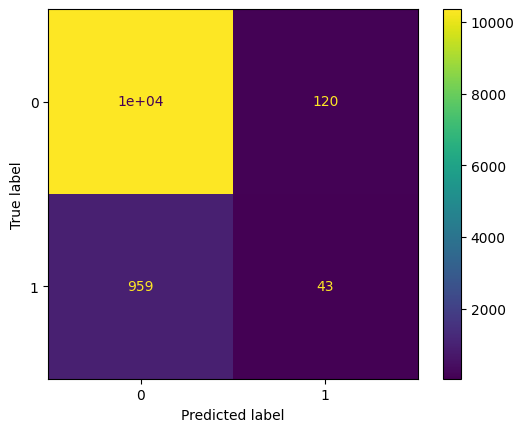

In [16]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion)
visualizacion.plot();

Tenemos nuestra matriz de confusión. En el eje Y tenemos los valores reales, 0 siendo cumplido, 1 siendo deudor. Y aquí en el eje X tenemos los valores previstos, 0 siendo cumplido y 1 siendo deudor.

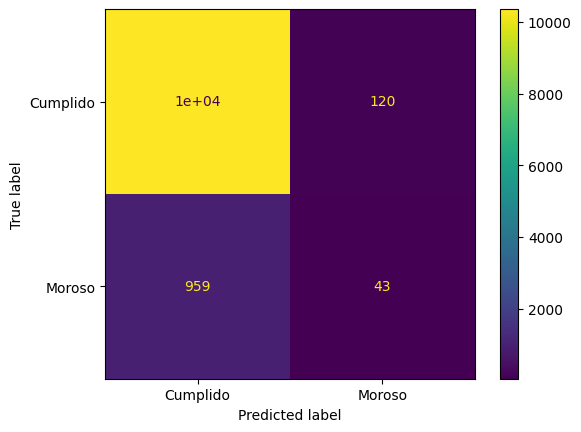

In [17]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Cumplido', 'Moroso'])
visualizacion.plot();

# **Desafío: construyendo un segundo modelo**

Se recomienda utilizar más de un modelo de clasificación en proyectos de **machine learning**, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempeño, después de todos los análisis y mejoras.

Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca Scikit-Learn tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y compara los resultados con el resultado del árbol de decisión.

Como un consejo, revisa la documentación del algoritmo [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier). Explora este material y observa cómo importar la función. Durante este proceso, recuerda verificar los parámetros del método para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Dividir el conjunto de datos en entrenamiento y validación
modelo_rf = RandomForestClassifier(max_depth=10, random_state=5)
# Ajustar el modelo
modelo_rf.fit(X, y)

# Evaluar el modelo
print(f'La exactitud del modelo es: {modelo_rf.score(X, y):.2%}')

La exactitud del modelo es: 91.48%


In [19]:
# Ajustar el modelo
modelo_rf.fit(X_train, y_train)

print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo_rf.score(X_train, y_train):.2%}')

print(f'La exactitud del modelo con el conjunto de validación es: {modelo_rf.score(X_val, y_val):.2%}')

La exactitud del modelo con el conjunto de entrenamiento es: 91.54%
La exactitud del modelo con el conjunto de validación es: 91.30%


In [20]:
# Evaluar el modelo con el conjunto de prueba
y_prev = modelo_rf.predict(X_val)
confusion = confusion_matrix(y_val, y_prev)
print(f'Matriz de confusión:\n{confusion}')

Matriz de confusión:
[[10479     0]
 [  999     3]]


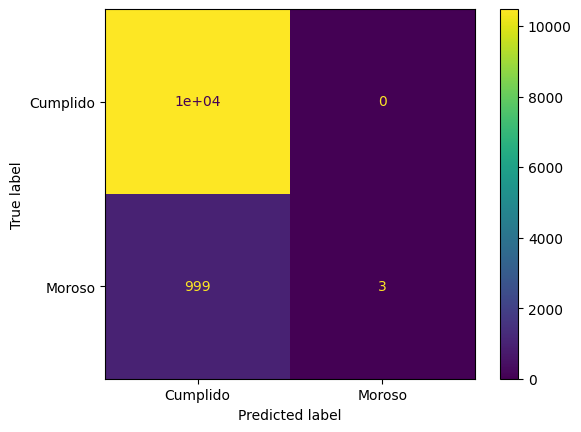

In [21]:
# Visualizar la matriz de confusión
ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['Cumplido', 'Moroso']).plot();

A partir de esta matriz, nos damos cuenta de que a pesar de una precisión mayor, el modelo `RandomForest` no logra identificar casi ningún cliente moroso, indicando un resultado bastante malo en relación al modelo de árbol de decisión.

## <font color='dark'>**Métricas de evaluación**</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

Tenemos verdaderos negativos en este primer cuadrante, que son los casos donde el valor real era cero, es decir, cumplido, es un cliente cumplido, cero. Y el valor predicho era cero, es decir, verdadero negativo. Realmente este es un cliente cumplido, verdadero negativo, que fueron más de 10.000.

También tenemos el caso donde el valor real era cero, pero yo predije que era un cliente moroso, entonces es un falso positivo, es decir, es un falso 1, es un falso moroso porque realmente este es cumplido. El falso positivo se conoce como error tipo 1.

Además, en este tercer cuadrante tengo los valores reales cuando es moroso, es decir, cuando es 1. Entonces, 1, y mi modelo dijo que era cumplido, es decir, que era cero, entonces es un falso negativo, es decir, yo lo predije como cero, falsamente, falso negativo, entonces tengo un error tipo 2. Hubo 957 casos donde mi modelo dijo que eran clientes cumplidos cuando en realidad eran morosos.

Y también tenemos los verdaderos positivos, que son los casos en los cuales el modelo efectivamente predijo clientes morosos que sí realmente eran morosos, entonces nota que únicamente hubo 45.

Aquí tengo, entonces, las métricas que vamos a calcular, que son precisión, recall, y F1 score. Accuracy, o exactitud, que es la primera métrica que utilizamos que era score, ella únicamente suma verdaderos positivos y verdaderos negativos, es decir, suma estos 10,000, más de 10,000, más estos 45, y los divide en el total de observaciones, es decir, sumando todo, sumando todos estos cuadritos.

$$precision = \frac{TP}{TP + FP}$$
$$recal = \frac{TP}{TP + FN}$$
$$ F1 = \frac{2 \times precision \times recall}{precision + recal}$$
$$ accuracy = \frac{TP + TN}{TP + FN + TN + FP}$$
$$ specificity = \frac{TN}{TN + FP}$$

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
presicion = 43/(43+125) # Precision
print(f'La precisión del modelo es: {presicion:.2%}')

La precisión del modelo es: 25.60%


In [24]:
print(f'La precisión del modelo es: {precision_score(y_val, y_previsto):.2%}')
print(f'La sensibilidad del modelo es: {recall_score(y_val, y_previsto):.2%}')
print(f'La exactitud del modelo es: {accuracy_score(y_val, y_previsto):.2%}')

La precisión del modelo es: 26.38%
La sensibilidad del modelo es: 4.29%
La exactitud del modelo es: 90.60%


Entonces, ¿qué quiere decir esto? Estoy prestando dinero, o la financiera, la empresa financiera está financiando a muchas personas morosas, entonces esto es un problema muy serio. La métrica de validación que se va a utilizar, la que vamos a mejorar es el recall. Queremos disminuir al máximo el error tipo 2

In [25]:
print(f'El F1 del modelo es: {f1_score(y_val, y_previsto)}')

El F1 del modelo es: 0.07381974248927038


### Curva ROC

In [26]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [27]:
from sklearn.metrics import RocCurveDisplay

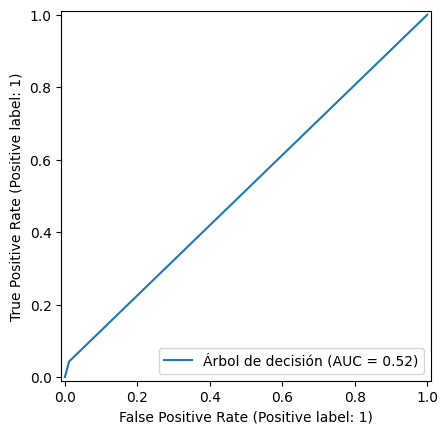

In [28]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Árbol de decisión');

In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val, y_previsto):.2%}')

El área bajo la curva ROC es: 51.57%


### Curva de  precisión x sensibilidad

In [31]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [32]:
from sklearn.metrics import PrecisionRecallDisplay

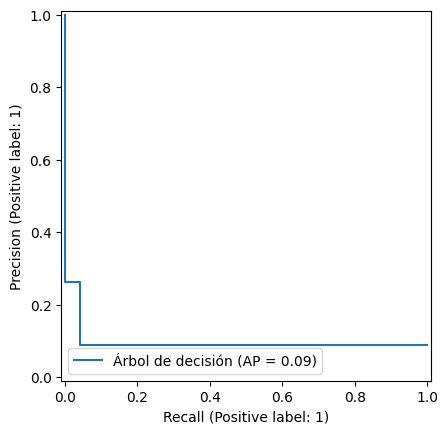

In [33]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Árbol de decisión');

In [34]:
from sklearn.metrics import average_precision_score

In [35]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val, y_previsto):.2%}')

El score promedio de precisión vs recall es: 9.49%


### Informe de métricas

Hemos calculado varias métricas para validar nuestro modelo, sin embargo, lo hemos hecho de forma aislada, una métrica a la vez. Podemos también utilizar un recurso que es un informe de métricas, que va a traer todos estos resultados ya consolidados para que podamos analizar directamente desde un mismo lugar.

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_val, y_previsto, target_names=['Cumplido', 'Moroso']))

              precision    recall  f1-score   support

    Cumplido       0.92      0.99      0.95     10479
      Moroso       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



Este informe de métricas es bastante útil. Sin embargo, no es la única manera de validar nuestros modelos. Hay, inclusive, otros pasos de validación muy interesantes, porque hasta el momento lo único que hemos hecho es validar este modelo inicial sin realizar ningún ajuste a él, sino entender muy bien las métricas que nos ofrece para, a partir de allí, entonces ver qué es lo que podemos hacer para mejorar nuestro modelo de clasificación.

## <font color='dark'>**Validación cruzada**</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [38]:
from sklearn.model_selection import KFold, cross_validate

In [39]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf)
cv_resultados

{'fit_time': array([0.13417077, 0.13162708, 0.13306689, 0.13044786, 0.13110399]),
 'score_time': array([0.00189424, 0.0014987 , 0.00169301, 0.00146627, 0.00150776]),
 'test_score': array([0.91377246, 0.90777439, 0.9070122 , 0.9135453 , 0.89917247])}

In [40]:
cv_resultados['test_score']

array([0.91377246, 0.90777439, 0.9070122 , 0.9135453 , 0.89917247])

In [41]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()

print(f'El promedio de la exactitud es: {promedio:.2%} con un desvio típico de {desvio_std:.2%}')

El promedio de la exactitud es: 90.83% con un desvio típico de 0.53%


In [42]:
print(f'El intervalo de confianza es: {promedio -2* desvio_std}, {min(promedio + 2* desvio_std, 1)}')

El intervalo de confianza es: 0.8975708920897908, 0.918939832106416


### Validación cruzada con sensibilidad

In [43]:
def intervalo_confianza(resultados):
    promedio = resultados['test_score'].mean()
    desvio_std = resultados['test_score'].std()
    return f'El intervalo de confianza es: [{promedio - 2 * desvio_std}, {min(promedio + 2 * desvio_std, 1)}]'

In [44]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring='recall')
cv_resultados

{'fit_time': array([0.13597083, 0.131284  , 0.13142228, 0.13031197, 0.12992311]),
 'score_time': array([0.00277114, 0.00253105, 0.00271177, 0.00257993, 0.00246692]),
 'test_score': array([0.02642008, 0.01980198, 0.01845018, 0.01305483, 0.02427746])}

In [45]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.011046251871428117, 0.029755560486454967]'

Entonces, ese es el resultado para *recall* que fue la métrica que estábamos priorizando. Recuerda que este modelo sigue siendo deficiente, no hemos trabajado en mejorar el modelo. Lo único que hemos hecho hasta ahora es validarlo, utilizar diversas técnicas para la validación con diversas métricas de modo que podamos tomar acciones basados en los resultados que seamos *data driven*.

### Estratificando los datos

In [46]:
datos['moroso'].value_counts()

moroso
0    49309
1     4716
Name: count, dtype: int64

Entonces tengo 4.716 morosas y 49.309 cumplidas. Entonces, ¿qué significa esto? Que más del 90% de mis datos pertenecen a una misma clase y el resto a otra clase, por lo que mi dataframe está muy desequilibrado.

Cuando hicimos los splits, no nos aseguramos de que se mantuviera la misma proporción de muestras. Por ejemplo, en este split es probable que haya quedado el 5% de la clase morosa y el 95% de la clase cumplida y en este grupo podría haber quedado el 100% de la clase cumplida y nada de morosa. Entonces, corremos el riesgo de que nuestro algoritmo aún no esté haciendo una validación cruzada efectiva.

In [47]:
from sklearn.model_selection import StratifiedKFold

In [48]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring='recall')

In [49]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.020951664662709615, 0.034923005715028946]'

*Entonces, el desvío típico aumentó, pero a principio, estoy obteniendo un intervalo de confianza con una variación que con este modelo puede presentar una puntuación de recall que va a variar entre el 0.02, o sea, 2% y el 3.7%, no puede esperar más de ello con este modelo.*

Aquí notamos un detalle muy interesante y es que estamos lidiando con un conjunto de datos desequilibrado, un conjunto de datos en el que tengo 50.000 registros que son personas cumplidas y tengo casi 5.000 que son personas morosas. Entonces, detectar a estas personas morosas de esta forma es muy difícil. ¿Qué estrategia podríamos implementar, entonces, para mejorar nuestra previsión?

# **Desafío: validación con otras métricas**

Es siempre importante analizar el problema de negocio antes de evaluar un modelo de clasificación, para que se elija la métrica más adecuada. En nuestro proyecto, estamos clasificando clientes morosos de una agencia de alquiler de vehículos e identificamos que la métrica más relevante es el recall, que busca minimizar la cantidad de personas morosas que son clasificadas como cumplidoras.

Para obtener un resultado completo de las métricas en la validación cruzada así como el [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), es necesario utilizar el método `cross_validate` e informar en el parámetro scoring las métricas a evaluar.

Como desafío, construye un código para generar el intervalo de confianza para cada una de las métricas utilizando la validación cruzada:

- Exactitud
- Recall
- Precisión
- F1-score

> *Un consejo es explorar la documentación del método `cross_validate` a partir de este [material de apoyo](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate), donde puedes descubrir una forma más simple de retornar las métricas de una sola vez con una lista de cadenas.*

Para solucionar el desafío, podemos explorar la documentación y darnos cuenta de que podemos utilizar una lista de métricas en el parámetro scoring. De esta manera, vamos a utilizar el código de la clase para validar el modelo con KFold, pero usando todas las métricas de evaluación de una sola vez:

In [50]:
# Definir el modelo
modelo_dt = DecisionTreeClassifier(max_depth = 10)
# Definir la validación cruzada
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
# Realizar la validación cruzada
cv_resultados = cross_validate(modelo_dt, X, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.135566  , 0.13181591, 0.13200402, 0.13028479, 0.13072705]),
 'score_time': array([0.00661111, 0.00927496, 0.00606489, 0.00559616, 0.00557804]),
 'test_accuracy': array([0.91301034, 0.90755662, 0.90712108, 0.91332753, 0.8997169 ]),
 'test_recall': array([0.02642008, 0.01856436, 0.01845018, 0.01436031, 0.02427746]),
 'test_precision': array([0.24390244, 0.21126761, 0.21428571, 0.21153846, 0.21428571]),
 'test_f1': array([0.0476758 , 0.03412969, 0.03397508, 0.02689487, 0.04361371])}

*El resultado obtenido es un diccionario con los tiempos de ajuste de los modelos, tiempos de cálculo de las métricas y los resultados de cada una de las métricas para cada uno de los 5 modelos del KFold.*

Para generar el intervalo de confianza para las métricas, podemos calcular la media y la desviación estándar de cada métrica y utilizar la función print() para presentar el resultado en pantalla. De este modo, podemos construir una función para crear este informe, usando un for para recorrer cada una de las claves del diccionario que acceden a las métricas:

In [51]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')

In [52]:
informe_metricas(cv_resultados)

Intervalo de confianza(test_accuracy): [0.8982285254226675, 0.9180644619317336]
Intervalo de confianza(test_recall): [0.011700160649929802, 0.02912879541449104]
Intervalo de confianza(test_precision): [0.19407552650777454, 0.24403644739945868]
Intervalo de confianza(test_f1): [0.022374711491584442, 0.05214095050459942]


## <font color='dark'>**Balanceo de los datos**</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
oversampling = SMOTE()
x_balanceada, y_balanceada = oversampling.fit_resample(X, y)

In [55]:
y_balanceada.value_counts(normalize=True)

moroso
0    0.5
1    0.5
Name: proportion, dtype: float64

In [56]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x_balanceada, y_balanceada, cv=skf, scoring='recall')

In [57]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.7054279366826316, 0.7356389780915703]'

*Observa que nuestro modelo aquí haciendo este ejercicio con `Smote`, ya nos trae unas métricas totalmente diferentes y que nos hacen, digamos, sorprendernos muchísimo con un resultado que pasó del 2% de recall al 71%. O sea, digamos, el intervalo de confianza, lo que puedo esperar de este modelo aquí, de esta manera como fue entrenado con oversampling, es que mi modelo generalice entre el 71% y el 75%. Pero, digamos, ¿qué tan confiable es este ejercicio? Porque generamos más de 40.000 datos o alrededor de 40.000 datos de forma sintética. ¿De acuerdo? Entonces, es un aspecto que debe ser considerado cuidadosamente.*

### Pipeline para validación

Obtuvimos resultados de *recall* bastante optimistas. Sin embargo, esta no es la forma de determinar que nuestro modelo está funcionando bien, porque en realidad estamos haciendo una validación con datos ya balanceados. La idea es entrenar nuestro modelo, lógicamente haciendo este *oversampling*, pero a la hora de validar nuestros datos, estos serán desbalanceados.

Por lo tanto, la forma correcta de realizar este proceso es utilizando un *pipeline* para la validación, utilizando, por supuesto, el *pipeline* que nos ofrece la biblioteca `imblearn`.

In [58]:
from imblearn.pipeline import Pipeline as imbpipeline

In [59]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([
    ('oversampling', SMOTE()),
    ('arbol', modelo)
])

In [60]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [61]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.21727019578431045, 0.2875949820949614]'

Es un resultado muy interesante porque estamos utilizando un árbol de decisión básico, elemental, únicamente con 10 de profundidad. Podríamos, por supuesto, hacer un tuning a nuestros parámetros, un ajuste a nuestros hiperparámetros para hacerlo más detallado, pero en principio, este método *oversampling* se muestra bastante prometedor.

Sin embargo, no solo podemos hacer un sobremuestreo. ¿Qué tal si, en vez de generar datos sintéticos, por el contrario, reducimos las muestras de nuestros datos? Entonces, en vez de tener la clase mayoritaria o la clase predominante que sea cumplidos, dejamos la clase predominante en la misma cantidad o en la misma proporción de la clase que es la minoría, que serían los clientes morosos. Eso sería el método *undersampling* (submuestreo) o el opuesto de *oversampling*.

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

Ya tenemos una pipeline para la validación de nuestro modelo de *oversampling*(sobremuestreo), sin embargo, mencionamos que si existe un *oversampling* debe existir también un *undersampling* (submuestreo). Este es un método en el cual, en lugar de generar datos sintéticos, ¿por qué no tomar la clase que tiene, digamos, la mayoría y reducirla, de modo que podamos tener los datos más parecidos a la clase de minoría? Pero también es importante que el patrón de datos allí no disminuya de forma aleatoria, sino que el patrón de datos que utilice para hacer esta disminución, se asemeje o tenga unas características que faciliten, de cierta forma, esta generalización a la hora de modelar.

Para ello, la misma biblioteca IMB Learn, nos trae un método que se llama NearMist, que tiene varias versiones. De hecho, voy a dejar una actividad asociada a este video, en la cual podrás entender mucho mejor en qué consiste este método. Pero básicamente es un algoritmo que hace esta reducción de muestras, de forma inteligente, para poder generalizar bien con el conjunto de datos.

In [62]:
from imblearn.under_sampling import NearMiss

In [63]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arbol', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [64]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.6246087947142458, 0.6993951778761258]'

*Observa que este **undersampling**, que lo que hizo fue entrenar nuestro modelo, lógicamente con datos ya balanceados, siguiendo la técnica **NearMist** en su versión 3, pero a la hora de validar utilizó datos completamente desbalanceados, nos trajo unos resultados bastante interesantes con un árbol de decisión de profundidad 10.*

### Probando el modelo

In [65]:
undersample = NearMiss(version=3)
x_balanceada, y_balanceada = undersample.fit_resample(X, y)

Después de hacer nuestro modelo, vamos a hacer nuestro Fit, entonces modelo.Fit y vamos a tomar nuestra `X_balanceada` y nuestra `Y_balanceada`. Hacemos el Fit y hacemos nuestro `Y_previsto`, entonces `Y_previsto` va a ser igual a modelo.predict y ahora sí vamos a pasar nuestra `X_test`. Hasta el momento hemos trabajado, habíamos trabajado todo el tiempo con `X_validación` pero ahora vamos a hacer nuestra prueba con nuestra `X_test`. Entonces estos son datos de prueba que nuestro modelo nunca vio. Estamos simulando datos de la vida real para ver cómo va a desempeñarse nuestro modelo y después vamos a hacer el reporte.

              precision    recall  f1-score   support

    Cumplido       0.94      0.48      0.64      7397
      Moroso       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



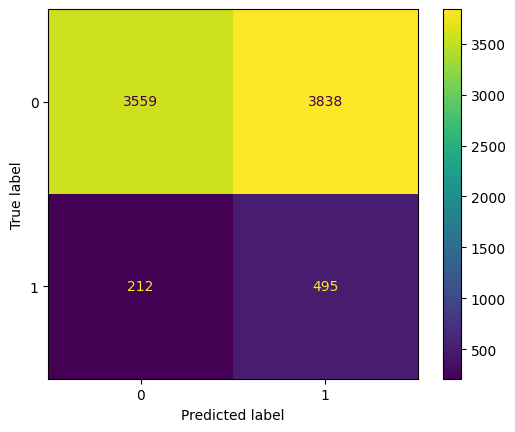

In [66]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada, y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto, target_names=['Cumplido', 'Moroso']))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

*Entonces nota que aquí está nuestro modelo final ya probado con datos que nunca vio, lo entrenamos siguiendo las mejores prácticas, trabajamos lógicamente con un modelo de undersampling. O sea todo siguiendo todos estos patrones y llegamos entonces a este modelo interesante que logra predecir de forma correcta, 495 casos en los cuales se trata de un cliente moroso.*

Ahora, están identificando correctamente a los clientes morosos, pero a cambio, podrían terminar prediciendo que clientes que son posiblemente buenos pagadores sean morosos. Por eso, estoy teniendo esta cantidad de falsos positivos (3831).

Para la empresa, esto representa lógicamente un riesgo que va a asumir. La idea es que no vamos a financiar a tantas personas, pero a cambio, nos aseguraremos de identificar a los morosos antes de conocer las características de estos clientes morosos antes de prestarles. Vamos a proceder con pasos un poco más seguros aquí, trabajando con este modelo de *Machine Learning* (Aprendizaje Automático) para identificar a clientes morosos.

# **Desafío: otros métodos de balanceo**

Durante la clase, exploramos dos estrategias de balanceo de datos: *oversampling* y *undersampling*. En cada una de ellas utilizamos un algoritmo diferente, el **SMOTE** para generar nuevos datos sintéticos y el NearMiss para mantener datos que tienen un patrón cercano entre las clases.

Estos no son los únicos algoritmos existentes y el oversampling y undersampling no necesitan ser utilizados de manera aislada. Es posible combinar las dos estrategias en una sola para equilibrar los puntos negativos de cada una de ellas. Esto no quiere decir que esta estrategia sea más efectiva en todas las ocasiones, pero es una opción que puede ser explorada en los proyectos.

Como desafío, utiliza el algoritmo **SMOTEENN**, que combina el *oversampling* con **SMOTE** y el *undersampling* con el **ENN** (*Edited Nearest Neighbours*), para balancear los datos y observa los resultados obtenidos por el modelo usando el pipeline y la validación cruzada.

> *Como un consejo, revisa la documentación del método **SMOTEENN** a partir de este [enlace](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html) para identificar cómo importar el método y cómo utilizarlo.*

Como primer paso, vamos a importar el método **SMOTEENN** desde la sección combine de la biblioteca `imblearn`. Los pasos para utilizar el método con la validación cruzada son los mismos. Debemos instanciar el modelo y crear un pipeline con los pasos de balanceo de los datos y ajuste del modelo.

In [67]:
from imblearn.combine import SMOTEENN

modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arbol', modelo)])

Después de eso, podemos utilizar la validación cruzada con el `StratifiedKFold` para mantener la proporción en los datos y utilizar el método `cross_validate` con el pipeline, evaluando el rendimiento con la métrica recall y generando el intervalo de confianza de esa métrica:

In [74]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring = 'recall')
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.32673202245474775, 0.4016305916093431]'

El recall de este modelo estuvo alrededor de 0.3 a 0.4, un poco mejor que el resultado usando solamente el *oversampling*,* pero peor que el resultado del undersampling. Por lo tanto, esta estrategia no fue tan eficiente para este caso, pero eso no significa que no pueda ser utilizada en otros proyectos.

# **Conclusión**

A lo largo de este entrenamiento, trabajamos con un modelo sencillo de árbol de decisión al cual aplicamos diversas técnicas para evaluarlo desde todos los puntos de vista.

Primero, separamos nuestra base en una base de pruebas que nuestro modelo nunca vio y también dejamos una base para entrenamiento y validación, con la cual trabajamos con las métricas de precisión, sensibilidad y exactitud.

Estuvimos trabajando con la matriz de confusión, explicando su funcionamiento y, adicionalmente, con la curva ROC, comprendiendo en qué consiste el área bajo la curva. De la misma manera, analizamos cómo podemos comparar la tasa de verdaderos positivos y la tasa de falsos positivos cuando queremos priorizar, por ejemplo, una métrica sobre la otra. En nuestro caso, la métrica que más impactaba el problema de negocios era el recall (tasa de acierto). Queríamos mejorar esa tasa de acierto para poder detectar de forma efectiva a los clientes morosos, de modo que la empresa financiera de automóviles no siguiera perdiendo dinero prestando a personas que no iban a pagar.